<h1 align=\"center\"><font color='green'><font size=\"10\">Model Evaluation</font> </h1>

<div style="background-color: #90EE90;">.</div>  </div>

Model evaluation is crucial in machine learning to determine how well a model performs on unseen data. Proper evaluation helps identify issues like overfitting and underfitting and allows for the comparison of different models.


 <div class = "alert alert-block alert-success">
     <font size = "5">
 Evaluation Metrics for Classification


   - Classification is a supervised learning task where the objective is to predict categorical labels for given input data. In classification, the model learns from labeled training data and assigns new instances to one of the predefined categories or classes.
   - Classification: Predicts discrete classes (categorical outcomes).

 - Example: Predicting whether an email is "spam" or "not spam," or classifying images of animals into categories like "cat," "dog," or "bird."

## Confusion Matrix 
  - A confusion matrix is a table used to evaluate the performance of a classification model by comparing predicted classifications with actual outcomes. It summarizes the counts of true positive, true negative, false positive, and false negative predictions.
  
In fraud detection, a confusion matrix helps identify correctly and incorrectly classified transactions, guiding improvements to reduce false negatives and false positives.
 

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
#Loading the Iris dataset
iris = load_iris()
# Assigning columns to Features(X) and target(y) 
X = iris.data
y = iris.target

In [3]:
#For simplicity, we'll convert this to a binary classification problem
y_binary = (y == 0).astype(int)  # Classifying if the flower is setosa (1) or not (0)


In [4]:
#Performing an 70/30 split to create training and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)


In [5]:
#Training the model 
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
#Predicting on the test model
y_pred = model.predict(X_test)

In [7]:
#importing libraries where necessary for better understanding
from sklearn.metrics import confusion_matrix

In [8]:
#Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[26  0]
 [ 0 19]]


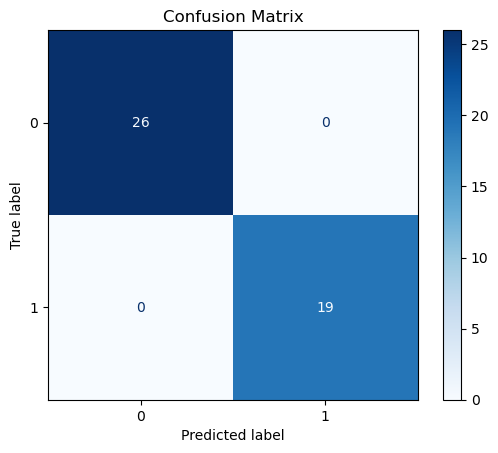

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
#Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Accuracy
 -  Proportion of correctly predicted instances out of the total.
 
General performance metric when the classes are balanced. Good for overall success rate in tasks like image classification.


##### Formula:


$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$


Example:
 - True Positives (TP): A marketing email gets correctly flagged as spam.
 - True Negatives (TN): A non-spam email is correctly identified as non-spam.
 - False Positives (FP): A non-spam email is incorrectly flagged as spam.
 - False Negatives (FN): A spam email is incorrectly identified as non-spam.
 
If there are 90 true results (TP + TN) out of 100 total emails, accuracy would be 

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{70 + 20}{70 + 20 + 5 + 5} = \frac{90}{100} = 0.90
$$


This means 90% of the emails were correctly classified. 

In [10]:
from sklearn.metrics import accuracy_score 
#calculating accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## Precision
 -  Measures how many of the positively predicted instances are actually positive.

Important in scenarios where the cost of false positives is high, such as spam detection (identifying spam emails) or medical diagnoses (confirming a disease).
##### Formula:

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$


Example: If 30 emails are flagged as spam, and 25 of them are actually spam (TP), then:



$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{25}{25 + 5} = \frac{25}{30} \approx 0.83
$$


This means 83% of flagged emails are correctly identified as spam.

In [11]:
from sklearn.metrics import precision_score
#calculating precision score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 1.00


## Recall (Sensitivity)
 -  Measures how many actual positive instances were captured by the model.
 
 Critical when false negatives are costly. For example, in cancer detection, you want to catch as many true cases as possible, even at the cost of some false positives.
##### Formula:

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$


Example: If there are 40 actual spam emails and 25 are correctly flagged (TP), then:

$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{25}{25 + 15} = \frac{25}{40} = 0.625
$$


This means the model correctly identifies 62.5% of all spam emails.

In [20]:
from sklearn.metrics import recall_score
#calculating recall score
recall = recall_score(y_test, y_pred)
print(f"recall: {recall:.2f}")

recall: 1.00


## F1 Score
 -  Harmonic mean of precision and recall, useful for imbalanced classes.
 
  Useful when you need a balance between precision and recall. Commonly used in information retrieval and classification tasks with imbalanced datasets.

##### Formula:

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$


Example: Continuing from previous examples, if Precision is 0.83 and Recall is 0.625, then:

$$
\text{F1 Score} = 2 \times \frac{Precision \times Recall}{Precision + Recall} = 2 \times \frac{0.83 \times 0.625}{0.83 + 0.625} \approx 0.714
$$


In [21]:
from sklearn.metrics import f1_score
#calculating f1 score
f1_score = f1_score(y_test, y_pred)
print(f" f1_score: { f1_score:.2f}")

 f1_score: 1.00


## ROC-AUC
 -  Area under the ROC curve, evaluating performance across thresholds.
 
 Helps in assessing the performance of a model across all classification thresholds. Useful for binary classifiers in risk assessment scenarios, like credit scoring.
 
###### Example: 
A ROC curve plots the True Positive Rate (Recall) against the False Positive Rate (FPR). The area under this curve (AUC) ranges from 0 to 1, where 1 indicates perfect classification.

In [ ]:
from sklearn.metrics import roc_curve, auc

#Calculate probabilities for ROC
y_true =[0, 1, 0, 1, 0, 1, 0, 1]  # Actual labels
y_probs = [0.1, 0.3, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9]  # Predicted Probabilities 

In [ ]:
#Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

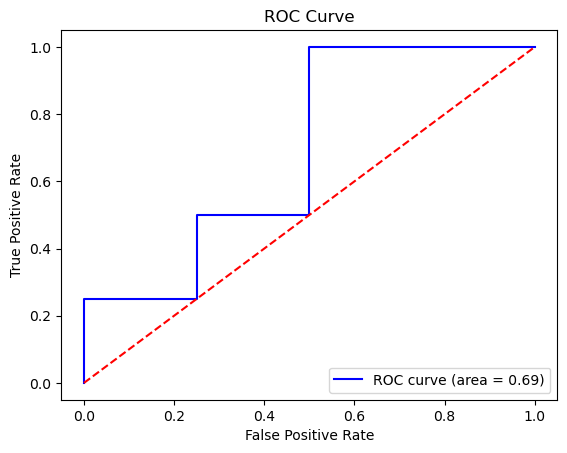

In [12]:
#Plotting
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
